<a href="https://colab.research.google.com/github/muriloroodrigues/Data-Science-Studies/blob/main/MLN.NeuralNetwork_IMDBdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
(treino_in, treino_out), (teste_in, teste_out) = imdb.load_data(num_words=10000);

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
treino_in.shape, treino_out.shape, teste_in.shape, teste_out.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
print(treino_in[14][:10])

[1, 503, 20, 33, 118, 481, 302, 26, 184, 52]


In [ ]:
print(treino_out[14])

0


In [ ]:
print(treino_in[0])
print(treino_in[1])
print(treino_in[2])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer(num_words=10000)
treino_in_DTM = tok.sequences_to_matrix(treino_in)
teste_in_DTM = tok.sequences_to_matrix(teste_in)
treino_in_DTM.shape, teste_in_DTM.shape

((25000, 10000), (25000, 10000))

In [ ]:
treino_out_DTM = treino_out 
teste_out_DTM = teste_out 
treino_out_DTM.shape, teste_out_DTM.shape

((25000,), (25000,))

Epoch 1/3
40/40 [==============================] - 3s 45ms/step - loss: 0.5021 - accuracy: 0.7901 - auc: 0.8831 - val_loss: 0.3644 - val_accuracy: 0.8712 - val_auc: 0.9439
Epoch 2/3
40/40 [==============================] - 1s 31ms/step - loss: 0.2853 - accuracy: 0.9033 - auc: 0.9635 - val_loss: 0.3147 - val_accuracy: 0.8768 - val_auc: 0.9509
Epoch 3/3
40/40 [==============================] - 1s 31ms/step - loss: 0.2161 - accuracy: 0.9242 - auc: 0.9766 - val_loss: 0.2764 - val_accuracy: 0.8904 - val_auc: 0.9558


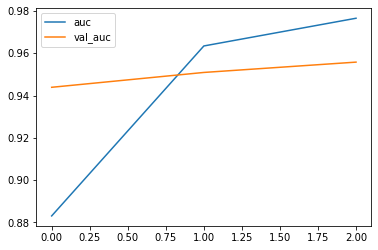

In [ ]:
from keras.models import Sequential
modelo = Sequential()

from keras.layers import Dense
modelo.add(Dense(16, activation='relu', input_shape=(10000,)))
modelo.add(Dense(16, activation='relu'))
modelo.add(Dense( 1, activation='sigmoid'))

modelo.compile(optimizer='rmsprop', 
               loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

historico = modelo.fit(treino_in_DTM, treino_out_DTM,
                       epochs=3, batch_size=512, validation_split=0.20)

import pandas as pd
historico_df = pd.DataFrame(historico.history)
historico_df.head()

historico_df.plot(use_index=True, y=['auc','val_auc']);

In [ ]:
historico_df.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
0,0.485916,0.81225,0.897904,0.354906,0.8770,0.945475
1,0.280512,0.90645,0.964037,0.293364,0.8832,0.954197
2,0.206000,0.92830,0.977838,0.289771,0.8836,0.955360


In [ ]:
results = modelo.evaluate(teste_in_DTM, teste_out_DTM)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.2846 - accuracy: 0.8866


[0.284618079662323, 0.8866400122642517]

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve
previsoes = modelo.predict(teste_in_DTM).ravel()
fpr, tpr, cortes = roc_curve(teste_out, previsoes)

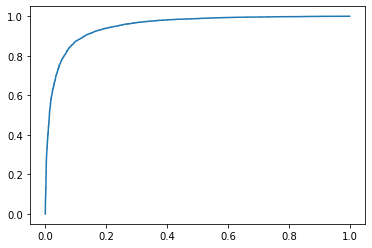

In [ ]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr);

In [ ]:
fpr

array([0.     , 0.     , 0.     , ..., 0.99336, 0.99352, 1.     ])

In [ ]:
tpr

array([0.00e+00, 8.00e-05, 8.88e-03, ..., 1.00e+00, 1.00e+00, 1.00e+00])

In [ ]:
cortes

array([1.9999938e+00, 9.9999374e-01, 9.9959350e-01, ..., 5.0530261e-06,
       4.9846544e-06, 3.5419798e-09], dtype=float32)

In [ ]:
cortes[(tpr - fpr).argmax()]

0.45412084

In [ ]:
modelo.save("modeloIMDB.h5")

In [ ]:
from keras.models import load_model
modelo1 = load_model("modeloIMDB.h5")

In [ ]:
modelo1.evaluate(teste_in_DTM, teste_out_DTM)

782/782 [==============================] - 4s 4ms/step - loss: 0.2945 - accuracy: 0.8829 - auc: 0.9509


[0.2945389151573181, 0.8829200267791748, 0.9508698582649231]

In [ ]:
modelo.evaluate(teste_in_DTM, teste_out_DTM)

782/782 [==============================] - 3s 4ms/step - loss: 0.2945 - accuracy: 0.8829 - auc: 0.9509


[0.2945389151573181, 0.8829200267791748, 0.9508698582649231]

In [ ]:
modelo1.predict(teste_in_DTM).ravel()[:10]

array([0.20961356, 0.9966751 , 0.63063526, 0.5649343 , 0.8682302 ,
       0.5390002 , 0.99470043, 0.00900885, 0.94341636, 0.9592346 ],
      dtype=float32)